In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()


In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['target']= boston.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
scaler = StandardScaler()

In [9]:

scaler.fit(data.drop('target',axis=1))
scaled_features = scaler.transform(data.drop('target',axis=1))
scaled_features_df = pd.DataFrame(scaled_features,columns= ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
listofones = [1] * 506
scaled_features_df.insert(0, "bias", listofones, True)

In [10]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(scaled_features_df,data['target'],test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [11]:
def LinearRegression (x,y,learning_rate):
    m = y.size
    list_costs = []
    theta = np.zeros((x.shape[1], 1))
    y_pred = np.dot(x, theta)
    y=np.expand_dims(y,axis=-1)
    cost_old = (1/(2*m))*np.sum(np.square(y_pred - y)) 
    d_theta = (1/m)*np.dot(x.T, y_pred - y)
    theta = theta - learning_rate*d_theta
    list_costs.append(cost_old)
    y_pred = np.dot(x, theta)
    cost_new = (1/(2*m))*np.sum(np.square(y_pred - y)) 
    iterations = 0
    number_iterations = [1]
    while(((cost_old - cost_new) > 0.001) or (cost_new > cost_old) ):
        d_theta = (1/m)*np.dot(x.T, y_pred - y)
        theta = theta - learning_rate*d_theta
        cost_old = cost_new
        list_costs.append(cost_old)
        y_pred = np.dot(x, theta)
        cost_new = (1/(2*m))*np.sum(np.square(y_pred - y))
        iterations=iterations + 1
        number_iterations.append(iterations)
        print("Cost old is :", cost_old)
        print("Cost new is :", cost_new)
        
   
    plt.plot(number_iterations, list_costs)
    plt.show()
    print("Cost old is :", cost_old)
    print("Cost new is :", cost_new)
    return y_pred,theta
    
        
        
        
    
    

In [12]:
x_train

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
322,1,-0.379654,-0.487722,-0.548149,-0.272599,-0.532942,-0.347096,-0.664090,0.440219,-0.523001,-0.720062,0.529158,0.441052,-0.694290
54,1,-0.418935,2.731245,-1.041323,-0.272599,-1.249924,-0.565069,-0.745879,1.675513,-0.752922,0.360888,1.222702,0.441052,0.300944
349,1,-0.417144,1.229060,-1.442573,-0.272599,-1.085795,0.932248,-1.211723,2.375447,-0.982843,-0.434976,0.575395,0.363753,-0.948004
16,1,-0.297868,-0.487722,-0.437258,-0.272599,-0.144217,-0.498110,-1.396638,0.334449,-0.637962,-0.601276,1.176466,0.330860,-0.851284
87,1,-0.412196,-0.487722,-0.969827,-0.272599,-0.913029,-0.233123,-0.418722,-0.022553,-0.752922,-0.957633,0.020560,0.421864,-0.590561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,1,-0.414721,0.413589,-0.802031,-0.272599,-0.999412,-0.408356,-1.677566,1.435452,-0.637962,-0.981390,-0.765457,0.441052,-0.591963
138,1,-0.391447,-0.487722,1.568995,-0.272599,0.598679,-0.609233,1.053485,-1.010845,-0.637962,0.170831,1.268938,0.387765,1.214877
343,1,-0.417558,1.872854,-1.073423,-0.272599,-0.610687,0.586056,-0.432946,0.920817,-0.523001,-0.227101,-0.395567,0.441052,-0.767180
174,1,-0.410687,-0.487722,-1.034027,-0.272599,-0.386091,-0.606384,0.004449,-0.519646,-0.523001,-0.666608,-0.857929,0.400813,-0.422352


In [13]:
y=y_train
x1 = x_train

x2 = np.square(x_train)

x3 = pd.DataFrame()
feature_name_list = ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
for i in range (14):
    feature_name = feature_name_list[i] 
    x3.insert(i, feature_name, np.power(x_train.iloc[:,i],i), True)

In [14]:
x3

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
322,1,-0.379654,0.237873,-0.164701,0.005522,-0.042993,0.001749,-5.696254e-02,1.410428e-03,-0.002928,3.747119e-02,9.108400e-04,0.000054,-8.710211e-03
54,1,-0.418935,7.459701,-1.129161,0.005522,-3.050826,0.032554,-1.284342e-01,6.211308e+01,-0.077759,3.747323e-05,9.131185e+00,0.000054,1.660805e-07
349,1,-0.417144,1.510589,-3.002021,0.005522,-1.509176,0.656429,-3.835512e+00,1.013824e+03,-0.855769,2.424682e-04,2.288883e-03,0.000005,-4.994973e-01
16,1,-0.297868,0.237873,-0.083601,0.005522,-0.000062,0.015274,-1.036542e+01,1.565466e-04,-0.017505,6.176457e-03,5.975476e+00,0.000002,-1.233019e-01
87,1,-0.412196,0.237873,-0.912185,0.005522,-0.634487,0.000161,-2.256743e-03,6.692712e-14,-0.077759,6.486215e-01,2.774346e-19,0.000032,-1.062777e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,1,-0.414721,0.171056,-0.515910,0.005522,-0.997064,0.004637,-3.739023e+01,1.802641e+01,-0.017505,8.287379e-01,-5.285993e-02,0.000054,-1.096041e-03
138,1,-0.391447,0.237873,3.862470,0.005522,0.076908,0.051133,1.440124e+00,1.090128e+00,-0.017505,2.116697e-08,1.373554e+01,0.000012,1.255803e+01
343,1,-0.417558,3.507582,-1.236837,0.005522,-0.084936,0.040517,-2.851276e-03,5.168775e-01,-0.002928,3.649184e-07,-3.710362e-05,0.000054,-3.189073e-02
174,1,-0.410687,0.237873,-1.105595,0.005522,-0.008579,0.049715,3.447891e-17,5.316952e-03,-0.002928,1.732633e-02,-1.853385e-01,0.000017,-1.360741e-05


Cost old is : 147.90745876972127
Cost new is : 78.4063700721593
Cost old is : 78.4063700721593
Cost new is : 44.582224783700234
Cost old is : 44.582224783700234
Cost new is : 27.959995211075906
Cost old is : 27.959995211075906
Cost new is : 19.71547284463458
Cost old is : 19.71547284463458
Cost new is : 15.584010242686634
Cost old is : 15.584010242686634
Cost new is : 13.486031086811234
Cost old is : 13.486031086811234
Cost new is : 12.400391857950076
Cost old is : 12.400391857950076
Cost new is : 11.822786869923833
Cost old is : 11.822786869923833
Cost new is : 11.50283970131356
Cost old is : 11.50283970131356
Cost new is : 11.3155478002418
Cost old is : 11.3155478002418
Cost new is : 11.198076732375169
Cost old is : 11.198076732375169
Cost new is : 11.118550421479933
Cost old is : 11.118550421479933
Cost new is : 11.060584317954095
Cost old is : 11.060584317954095
Cost new is : 11.015594071718288
Cost old is : 11.015594071718288
Cost new is : 10.978956628794132
Cost old is : 10.97895

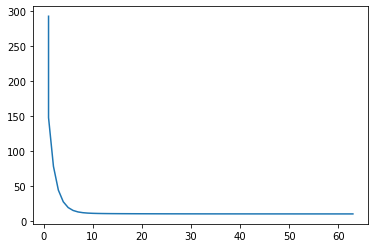

Cost old is : 10.656907039155818
Cost new is : 10.655909532064388
(101, 1)
[[22.32799476]
 [-0.7428025 ]
 [ 1.15818535]
 [-0.94116186]
 [ 0.73239835]
 [-1.71292092]
 [ 2.40530328]
 [-0.42777363]
 [-3.73895526]
 [ 1.81372048]
 [-1.22566269]
 [-1.80703219]
 [ 0.63009324]
 [-3.48245813]]


In [15]:

y_pred1,theta_final1 = LinearRegression(x1,y,0.3)
y_pred_cv1 = np.dot(x_cv, theta_final1)
print(y_pred_cv1.shape)
print(theta_final1)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_cv,y_pred_cv1)

20.779152309575373